<a href="https://colab.research.google.com/github/NourHamdach/ASP.NET-API-WEB/blob/main/Copy_of_%5BBlanks%5D_Project_Machine_Translation_(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture
© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [1]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

## Getting the data

In [2]:
#Test Your Zaka
!git clone https://github.com/zaka-ai/machine_learning_certification
%cd /content/machine_learning_certification/Challenge 7

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 43.23 MiB | 18.28 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/machine_learning_certification/Challenge 7


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [3]:
#Test Your Zaka (English)
#without header
english= pd.read_csv("en.csv",header=None)
english.head()

,0
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [4]:
#Test Your Zaka (French)
#without header
french= pd.read_csv("fr.csv",header=None)
french.head()

,0
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


**How many sentences does each of the files contain?**

In [5]:
#Test Your Zaka
print("English Sentences: ",len(english))
print("French Sentences: ",len(french))

English Sentences:  137860
French Sentences:  137860


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [6]:
#Test Your Zaka
df=pd.concat([english,french],axis=1)
df.head()

,0,0
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Let's name the columns as **English** and **French** so that we access them easier.

In [7]:
#Test Your Zaka
df.columns=["English","French"]
df.head()


,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Pick a sentence and print it in both languages

In [8]:
#Test Your Zaka
print("in English:",df.iloc[0,0])
print("in French:",df.iloc[0,1])

in English: new jersey is sometimes quiet during autumn , and it is snowy in april .
in French: new jersey est parfois calme pendant l' automne , et il est neigeux en avril .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [9]:
#Test Your Zaka
import string

def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

df['English'] = df['English'].apply(remove_punctuation)
df['French'] = df['French'].apply(remove_punctuation)


Make sure that the punctuation is removed by printing the example that you printed earlier.

In [40]:
#Test Your Zaka
print("in English:",df.iloc[0,0])
print("in French:",df.iloc[0,1])

in English: new jersey is sometimes quiet during autumn  and it is snowy in april 
in French: new jersey est parfois calme pendant l automne  et il est neigeux en avril 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [10]:
#Test Your Zaka
df["ENG Length"]=df["English"].str.split().str.len()
df.head()

,English,French,ENG Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l automne...,13
1,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,15
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13
3,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...,14
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14


In [11]:
#Test Your Zaka
df["FR Length"]=df["French"].str.split().str.len()
df.head()

,English,French,ENG Length,FR Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l automne...,13,14
1,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,15,13
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
3,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...,14,13
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

<Axes: title={'center': 'English Sentence Length Distribution'}, ylabel='Frequency'>

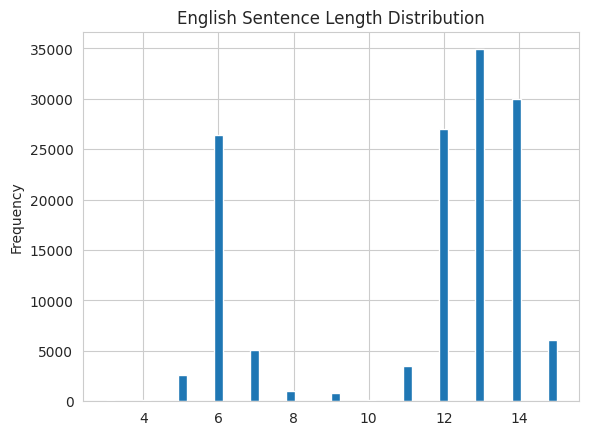

In [45]:
df['ENG Length'].plot(kind='hist', bins=50, title='English Sentence Length Distribution')

<Axes: title={'center': 'French Sentence Length Distribution'}, ylabel='Frequency'>

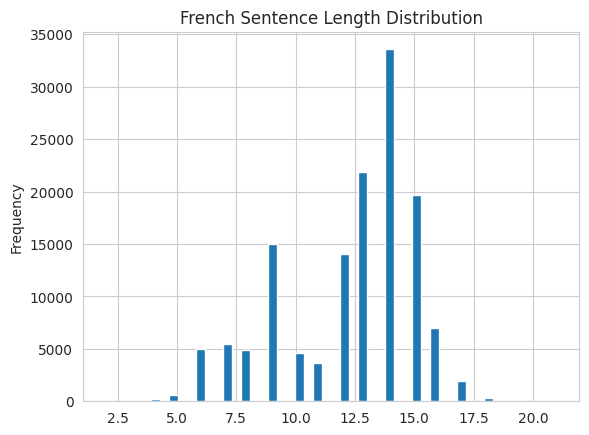

In [46]:
#Test Your Zaka
df['FR Length'].plot(kind='hist', bins=50, title='French Sentence Length Distribution')

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [12]:
#Test Your Zaka
max_length_english = df['ENG Length'].max()
max_length_french = df['FR Length'].max()

print("Maximum length of English sentences:", max_length_english)
print("Maximum length of French sentences:", max_length_french)

Maximum length of English sentences: 15
Maximum length of French sentences: 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

False, It's like trying to use the same dictionary for English and French so it won't work perfectly. Each language has its own unique words and grammar rules. For the best translation results, it's better to use separate tools (tokenizers) specifically designed for each language. This ensures that the words are broken down correctly and understood in context.

Tokenize the sentences that we have.

In [13]:
#Test Your Zaka
from tensorflow.keras.preprocessing.text import Tokenizer
en_tokenizer=Tokenizer()
en_tokenizer.fit_on_texts(df["English"])
en_Tokenized=en_tokenizer.texts_to_sequences(df["English"])
french_tokenizer=Tokenizer()
french_tokenizer.fit_on_texts(df["French"])
french_tokenized=french_tokenizer.texts_to_sequences(df["French"])



**How many unique words do we have in english and in french?**

In [59]:
#Test Your Zaka
print("Unique words in English:",len(en_tokenizer.word_index))
print("Unique words in French:",len(french_tokenizer.word_index))

Unique words in English: 199
Unique words in French: 344


####Padding

**What should be the length of the sequences that we have after padding?**

After padding, all sequences in each language should match the length of the longest sentence in that language. This ensures that every sequence has the same length, making it easier for the model to process them consistently.

In English, the padding length is 15.
In French, the padding length is 21.

Perform padding on the sequences that we have.

In [15]:
#Test Your Zaka
from tensorflow.keras.preprocessing.sequence import pad_sequences
en_Tokenized_padded=pad_sequences(en_Tokenized,maxlen=max_length_english,padding="post")
french_Tokenized_padded=pad_sequences(french_tokenized,maxlen=max_length_french,padding="post")

##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [62]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,RepeatVector,TimeDistributed,GRU
#Define the model
model = Sequential()
model.add(Embedding(input_dim=len(en_tokenizer.word_index) + 1,
                    output_dim=128,
                    input_length=max_length_english))
model.add(GRU(64))  # Encoder GRU
model.add(RepeatVector(max_length_french))  # Repeat encoder output for decoder
model.add(GRU(64, return_sequences=True))  # Decoder GRU
model.add(TimeDistributed(Dense(len(french_tokenizer.word_index) + 1, activation='softmax')))

# Compile the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_10 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_5 (RepeatVector)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [63]:
#Test Your Zaka
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(en_Tokenized_padded, french_Tokenized_padded, batch_size=64, epochs=25, validation_split=0.2)

Epoch 1/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 126s 69ms/step - accuracy: 0.4779 - loss: 2.6349 - val_accuracy: 0.5874 - val_loss: 1.5944
Epoch 2/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 121s 70ms/step - accuracy: 0.6088 - loss: 1.4690 - val_accuracy: 0.6717 - val_loss: 1.1585
Epoch 3/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 139s 69ms/step - accuracy: 0.6871 - loss: 1.1005 - val_accuracy: 0.7255 - val_loss: 0.9473
Epoch 4/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 143s 69ms/step - accuracy: 0.7365 - loss: 0.9053 - val_accuracy: 0.7524 - val_loss: 0.8421
Epoch 5/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 140s 68ms/step - accuracy: 0.7612 - loss: 0.8016 - val_accuracy: 0.7764 - val_loss: 0.7430
Epoch 6/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 119s 69ms/step - accuracy: 0.7853 - loss: 0.7077 - val_accuracy: 0.7990 - val_loss: 0.6603
Epoch 7/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 139s 68ms/step - accuracy: 0.8070 - loss: 0.6319 - val_accuracy: 0.8197 - val_loss: 0.5933
Epoch 8/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 146s 70ms/step - accuracy: 

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [64]:
#Test Your Zaka
def translate_sentence(input_sentence):
    input_sequence = en_tokenizer.texts_to_sequences([input_sentence])
    input_sequence = pad_sequences(input_sequence, maxlen=max_length_english, padding='post')
    predicted_sequence = model.predict(input_sequence)
    predicted_sequence = np.argmax(predicted_sequence, axis=-1)
    translated_sentence = french_tokenizer.sequences_to_texts(predicted_sequence)
    return translated_sentence[0]

Test the following sentence

In [66]:
input = "she is driving the truck"

#Test Your Zaka
print(translate_sentence(input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
elle conduit le camion camion


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [67]:
#Test Your Zaka
from tensorflow.keras.layers import Bidirectional

# Define model2 with Bidirectional GRU
model2 = Sequential()
model2.add(Embedding(input_dim=len(en_tokenizer.word_index) + 1,
                     output_dim=128,
                     input_length=max_length_english))
model2.add(Bidirectional(GRU(64)))  # Bidirectional Encoder GRU
model2.add(RepeatVector(max_length_french))
model2.add(Bidirectional(GRU(64, return_sequences=True)))  # Bidirectional Decoder GRU
model2.add(TimeDistributed(Dense(len(french_tokenizer.word_index) + 1, activation='softmax')))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_6 (RepeatVector)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

compile and train your new model.

In [69]:
#Test Your Zaka
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(en_Tokenized_padded, french_Tokenized_padded, batch_size=64, epochs=25, validation_split=0.2)

Epoch 1/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 249s 137ms/step - accuracy: 0.9823 - loss: 0.0616 - val_accuracy: 0.9796 - val_loss: 0.0746
Epoch 2/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 262s 137ms/step - accuracy: 0.9841 - loss: 0.0548 - val_accuracy: 0.9778 - val_loss: 0.0799
Epoch 3/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 263s 138ms/step - accuracy: 0.9839 - loss: 0.0555 - val_accuracy: 0.9725 - val_loss: 0.1031
Epoch 4/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 259s 136ms/step - accuracy: 0.9816 - loss: 0.0639 - val_accuracy: 0.9781 - val_loss: 0.0794
Epoch 5/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 262s 136ms/step - accuracy: 0.9846 - loss: 0.0528 - val_accuracy: 0.9807 - val_loss: 0.0706
Epoch 6/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 237s 138ms/step - accuracy: 0.9851 - loss: 0.0515 - val_accuracy: 0.9802 - val_loss: 0.0715
Epoch 7/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 268s 141ms/step - accuracy: 0.9860 - loss: 0.0483 - val_accuracy: 0.9785 - val_loss: 0.0790
Epoch 8/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 241s 140ms/step - ac

Define a new function that relies on your new model to make predictions.

In [70]:
#Test Your Zaka
def translate_sentence_model2(input_sentence):
    input_sequence = en_tokenizer.texts_to_sequences([input_sentence])

    input_sequence = pad_sequences(input_sequence, maxlen=max_length_english, padding='post')

    predicted_sequence = model2.predict(input_sequence)

    predicted_sequence = np.argmax(predicted_sequence, axis=-1)

    translated_sentence = french_tokenizer.sequences_to_texts(predicted_sequence)

    return translated_sentence[0]

In [76]:
input = "she is driving the truck"
#Test Your Zaka
print(translate_sentence_model2(input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
elle conduit le camion camion


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

 incorporating an attention mechanism would likely be the most efficient architectural adjustment to enhance the machine translation model

**What are some additional ways that we can do to improve the performance of our model?**

Data Augmentation,
Hyperparameter Tuning,
training more

In [19]:
#use attention mechanism
model3=se